In [1]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

# %matplotlib inline
# %precision 2

import logging
logging.basicConfig(level=logging.INFO)

# Set seed for reproducibility
seed = 1
np.random.seed(seed)

import elfi
from elfi.examples import ma2
from elfi.methods.parameter_inference import ROMC
model = ma2.get_model(seed_obs=seed)

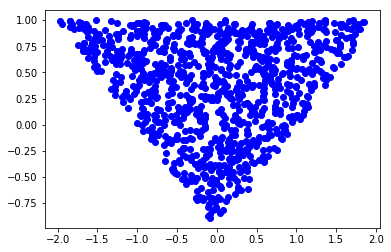

In [2]:
x = model.generate(1000)

plt.plot(x["t1"], x["t2"], "bo")
plt.show()

In [3]:
bounds = [(-2,2), (-2,2)]
romc = ROMC(model, bounds=bounds, discrepancy_name="d")

In [4]:
n1 = 3000
seed = 21
romc.solve_problems(n1=n1, seed=seed)

### Solving problems using a gradient-based method ###
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 94.988 sec
Time: 94.988 sec


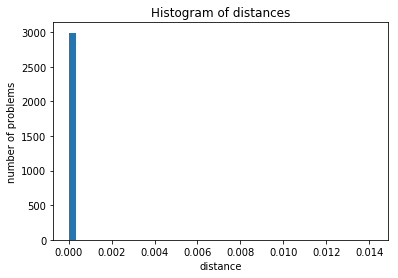

In [5]:
romc.distance_hist(bins=40)

In [6]:
eps = .5
romc.estimate_regions(eps=eps, fit_models=True, eps_cutoff=0.1)

Total solutions: 3000, Accepted solutions after filtering: 3000
### Estimating regions ###

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 205.219 sec 

### Fitting local models ###

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 68.976 sec 



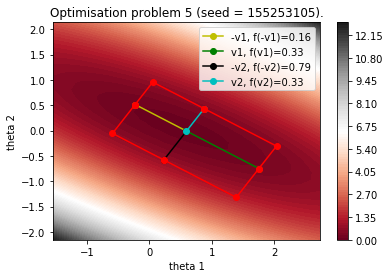

In [7]:
romc.visualize_region(5)

In [8]:
romc.eval_unnorm_posterior(np.array([[0.6, 0.2]]))

array([695.25])

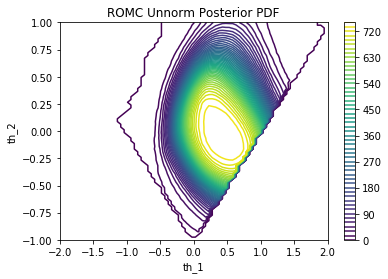

In [21]:
def plot_romc_posterior(posterior, nof_points):
    plt.figure()
    th1 = np.linspace(bounds[0][0], bounds[0][1], nof_points)
    th2 = np.linspace(-1, 1, nof_points)
    X, Y = np.meshgrid(th1, th2)

    x_flat = X.flatten()
    y_flat = Y.flatten()
    th = np.stack((x_flat, y_flat), -1)
    z_flat = posterior(th)
    Z = z_flat.reshape(nof_points, nof_points)
    
    plt.contour(X, Y, Z, 50, cmap='viridis')
    plt.title('ROMC Unnorm Posterior PDF')
    plt.xlabel("th_1")
    plt.ylabel("th_2")
    plt.colorbar()
    plt.show(block=False)
    
plot_romc_posterior(romc.eval_unnorm_posterior, nof_points=80)

In [10]:
n2 = 20
tmp = romc.sample(n2=n2)

### Getting Samples from the posterior ###

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 60.461 sec 



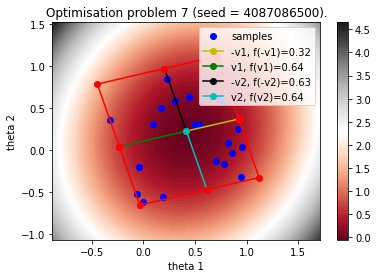

In [11]:
# As before but now it plots the samples as well
romc.visualize_region(7)

# ROMC - check the obtained samples

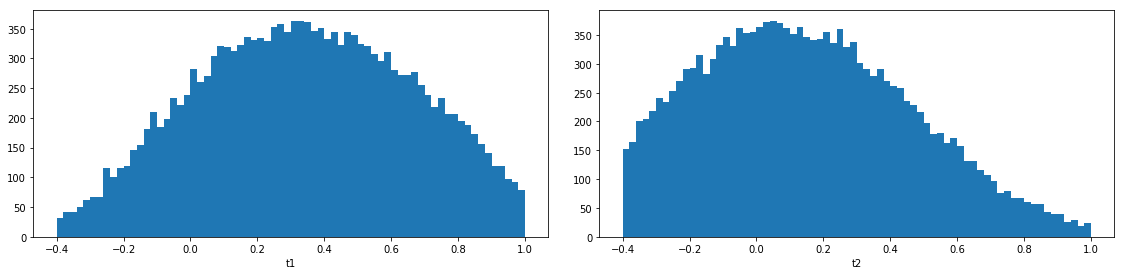

In [12]:
romc.result.plot_marginals(weights=romc.result.weights, bins=70, range=(-.4, 1))
plt.show()

In [13]:
romc.result.summary()

Method: ROMC
Number of samples: 60000
Sample means: t1: 0.357, t2: 0.11


In [14]:
x = romc.result.samples_array
weights = romc.result.weights
np.cov(x, rowvar=False, aweights=weights)

array([[0.12023426, 0.01741797],
       [0.01741797, 0.11594795]])

# Rejection ABC - check obtained samples

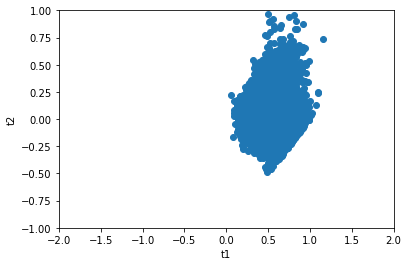

Progress: |██████████████████████████████████████████████████| 100.0% Complete
CPU times: user 1min 9s, sys: 27.2 s, total: 1min 36s
Wall time: 33.6 s
Method: Rejection
Number of samples: 10000
Number of simulations: 1190000
Threshold: 0.1
Sample means: t1: 0.514, t2: 0.0706


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb2c51e470>,
      dtype=object)

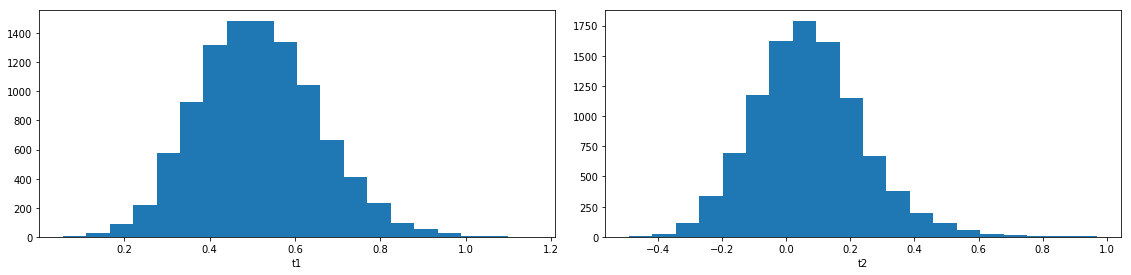

In [15]:
N=10000
rej = elfi.Rejection(model, discrepancy_name="d", batch_size=10000, seed=seed)
vis = dict(xlim=[-2,2], ylim=[-1,1])
%time result = rej.sample(N, threshold=.1, vis=vis)
result.summary()
result.plot_marginals()

In [16]:
x = result.samples_array
weights = None
np.cov(x, rowvar=False)

array([[0.01998835, 0.0030093 ],
       [0.0030093 , 0.0299338 ]])